In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Задание 1:

В папке находится изображение railway.jpeg с железной дорогой, уходящей вдаль от камеры. Необходимо, используя перспективное преобразование, развернуть дорогу таким образом, чтобы она была непосредственно перед нами.

Пример результата с подсказкой содержит изображение railway_result.png.

## Подсказка 2:

чтобы было легче определять координаты ключевых точек изображения, отобразите его с помощью plt.imshow(img) (!не в ноутбуке) - в правом нижнем углу открытого окна будут отображаться координаты пикселей, на которые Вы наводите мышкой.


# Задание 2:

В папке находится изображение palm.png с пальмой. Используя классические аффинные преобразования, необходимо создать "тень" для этой пальмы и отрисовать ее с ней на одном рисунке. Пример результата находится в изображении palm_result.png


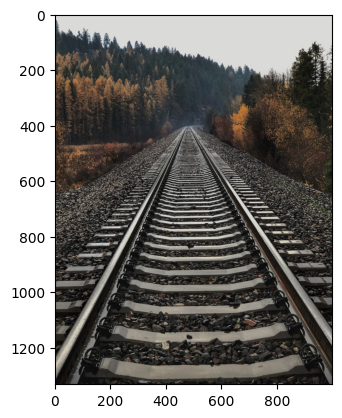

In [2]:
img = cv.imread("./railway.jpeg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

# Задание 1:

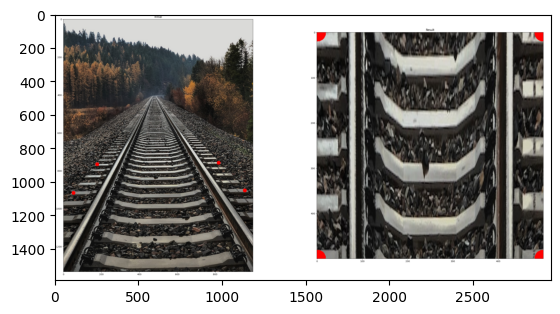

In [3]:
img_2 = cv.imread("./railway_result.png")
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

plt.imshow(img_2)

In [4]:
height, width = img.shape[:2]

points = [
    [200, 750],
    [820, 750],
    [20, 950],
    [950, 950],
]

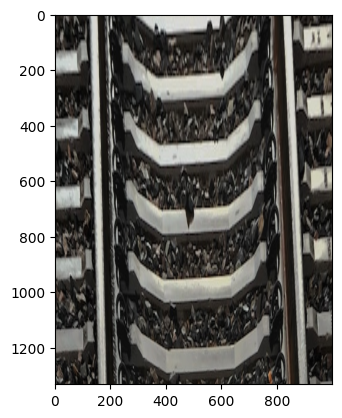

In [5]:
corners = [[0, 0], [width, 0], [0, height], [width, height]]
warp_matrix = cv.getPerspectiveTransform(np.float32(points), np.float32(corners))
transformed = cv.warpPerspective(img, warp_matrix, (width, height))

plt.imshow(transformed)

# Задание 2:

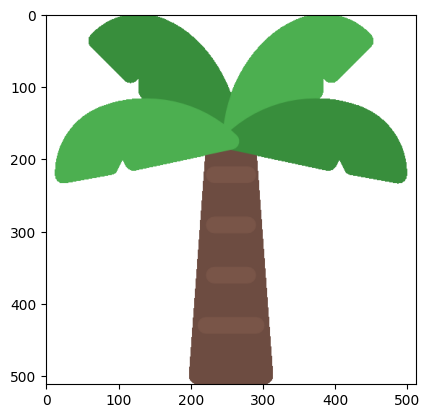

In [6]:
img = cv.imread("./palm.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

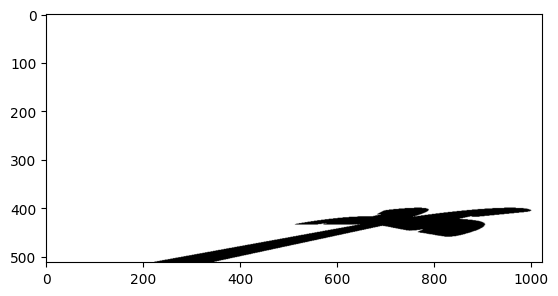

In [7]:
black_palm = cv.threshold(img, thresh=200, maxval=255, type=cv.THRESH_BINARY)[1]
height, width = black_palm.shape[:2]

points_init = np.float32([[0, 0], [height, 0], [0, width], [height, width]])
points = np.float32([
    [700,  400],
    [1100, 400],
    [180,  490],
    [300,  600]]
)

M = cv.getPerspectiveTransform(np.float32(points_init), np.float32(points))
shadow = cv.warpPerspective(black_palm, M, (width * 2, height), borderValue=(255, 255, 255))
plt.imshow(shadow)
plt.show()

In [8]:
def remove_background(img):
    cp = img.copy()
    cp_alpha = cv.cvtColor(cp, cv.COLOR_RGB2RGBA)
    alpha_mask = cv.threshold(img, thresh=200, maxval=255, type=cv.THRESH_BINARY_INV)[1]
    cp_alpha[..., 3] = alpha_mask[..., 0]
    return cp_alpha

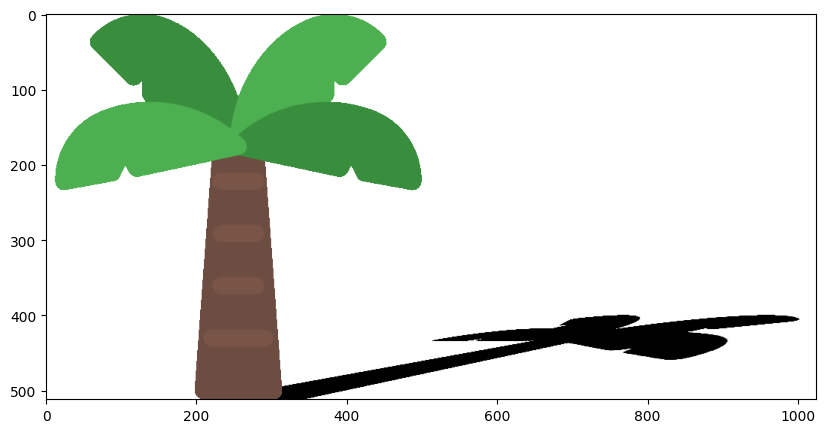

In [10]:
plt.figure(figsize=(10, 5))
plt.xlim(0, shadow.shape[1])
plt.imshow(shadow)
plt.imshow(remove_background(img))